<a href="https://colab.research.google.com/github/jellevanham/GroupAssignment1_2dd80/blob/main/Copy_of_Assignment_1_Supermarket_Expenditures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics for IE - Assignment 1


In this assignment, you will work with data on the expenditures of American households on 18 categories of supermarket goods. In **Part A**, you will apply the concepts you have learned in Chapter 6. You will first explore the data, by making beautiful plots and computing numerical summary statistics. In **Part B**, you will apply the concepts you have learned in Chapter 10 to compare the average expenditures across different categories or between different groups in the household sample. 

You can choose to focus your analyses on one of the following challenges. So the first thing you need to do as a team is to determine which challenge to work on. Then, you work on that one challenge for entire assignment (i.e. both **Part A** and **Part B**). 
- **Challenge 1:** Eating healthy has undeniable benefits to individuals and society as it reduces the risk of illness and improves feelings of well-being. What do the data tell about healthy consumption patterns? Questions can include, but are not limited to: Are expenditures in healthy and unhealthy categories correlated? Are there differences in expenditures on healthy consumption categories between family types? 
- **Challenge 2:** On November 7th 2020, US president-elect Joe Biden emphasized the importance of ''the battle to achieve racial justice and root out systemic racism in this country''. As consumption is driven by income, and income by opportunity, we would expect similar consumption patterns across races in a society without systemic racism. What do the data tell about spending patterns across racial groups? Questions can include, but are not limited to: In which categories do we see differences in expenditure levels between the racial groups? Are the correlations between the expenditures in the categories different between racial groups? 
- **Challenge 3:** The adverse effects of heavy smoking and alcohol consumption are well-known. What do the data tell us about expenditures on smoking an alcohol? Questions can include, but are not limited to: Are expenditures on smoking and alcohol correlated with each other, or with spending in other categories? Are the spending patterns on smoking and alcohol different in urban compared to rural areas?
- **Open Challenge:** Did you think of another interesting challenge to work on with this data set? You can define your own challenge. You first discuss it with your instructor in the Assignment Q&A session. If the instructor agrees, you're all set to start working on your own challenge.  



## The Data

The U.S. Bureau of Labor Statistics collects extensive data on the expenditures of American consumers. In the **Consumer Expenditure Surveys** (see https://www.bls.gov/cex/home.htm), American households are systematically surveyed on their expenditures. In this assignment, we work with a subset of the 2019 expenditure data, focusing on the supermarket expenditures. Particularly, the data contain supermarket expenditures of American households for one week in January 2019. All these households reported how much they have spent on the following categories in that week: 
1. CEREAL: Breakfast cereals
2. BAKEPROD: Bakery products such as bread and toast
3. MEATS: All meats and fish
4. DAIRY: Milk, yoghurts, eggs, etc.
5. FRSHFRUT: Fresh fruits
6. FRSHVEG: Fresh vegetables
7. PROCFRUT: Produced fruits (e.g. frozen or canned)
8. PROCVEG: Produced vegetables (e.g. frozen or canned)
9. SWEETS: Includes chocolates, candy, cookies, ice cream, etc.
10. NONALBEV: Non-alcoholic beverages
11. OILS: All oils such as baking or salad oil
12. MISCFOOD: All other food items such as frozen pizzas and spices
13. ALCBEV: Alcoholic beverages
14. SMOKSUPP: Smoking supplies (cigarettes, tobacco, etc.)
15. PET_FOOD: Pet food
16. PERSPROD: Personal care products such as soap, shampoo, face lotion
17. DRUGSUPP: Non-prescription drugs and vitamins
18. HOUSKEEP: Housekeeping items such as cleaning detergent

In addition, the data contains the following household characteristics: 
- AGE_REF: Age of the reference person (i.e. the person who answers the daily survey) 
- BLS_URBN: Whether the household lives in an urban or rural area, BLS_URBN=1 if urban, BLS_URBN=2 if rural
- FAM_SIZE: Number of family members
- FAM_TYPE: Composition of the household members
    1. FAM_TYPE=1 for couple without children
    2. FAM_TYPE=2 for couple with children
    3. FAM_TYPE=3 for single-parent household
    4. FAM_TYPE=4 for singles
    5. FAM_TYPE=5 for other (e.g. a household where a grandad and grown-up grandson live together)
- RACE_REF: Race of the reference person
    1. RACE_REF=1 for white
    2. RACE_REF=2 for black
    3. RACE_REF=3 for native American
    4. RACE_REF=4 for Asian
    5. RACE_REF=5 for other
    6. RACE_REF=6 for Multiracial
- HISP_REF: Ethnicity of the reference person
    1. HISP_REF=1 for Hispanic
    2. HISP_REF=2 for non-Hispanic

### Setting up the Python Environment and Reading the Data

To get you going, here are the packages you will need and the code to load the data into Python. 

In [36]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ttest_ind
import seaborn as sns
sns.set()


Importing and cleaning data from people that do not spend any money on any category

In [37]:
url='https://raw.githubusercontent.com/jellevanham/GroupAssignment1_2dd80/main/SupermarketExpenditureData.csv'
Data = pd.read_csv(url)
Data=Data[Data.iloc[:,0:17].sum(axis=1)!=0]
Data.head()

,CEREAL,BAKEPROD,MEATS,DAIRY,FRSHFRUT,FRSHVEG,PROCFRUT,PROCVEG,SWEETS,NONALBEV,OILS,MISCFOOD,ALCBEV,SMOKSUPP,PET_FOOD,PERSPROD,DRUGSUPP,HOUSKEEP,AGE_REF,BLS_URBN,FAM_SIZE,FAM_TYPE,RACE_REF,HISP_REF
0,23.24113,41.75852,57.08764,33.54323,19.22801,22.8118,7.58306,18.25788,10.32911,34.65994,15.1132,58.58641,0.0,0.0,0.00,0.00,0.00,0.00,26,1,5,5,4,2
2,4.78000,0.00000,0.00000,2.99000,0.00000,0.0000,0.00000,0.00000,0.00000,10.72000,0.0000,0.00000,0.0,0.0,0.00,0.00,0.00,0.00,54,1,2,1,1,1
3,6.98000,44.43000,40.25000,25.89000,12.34000,7.1500,6.96000,3.48000,2.22000,16.64000,1.9800,56.38000,0.0,0.0,10.97,0.00,4.98,3.09,54,1,2,1,1,1
4,4.50000,3.50000,26.00000,20.65000,2.25000,13.0000,4.00000,0.00000,2.00000,2.65000,5.4900,9.50000,0.0,0.0,0.00,0.00,0.00,0.00,71,1,2,1,1,2
5,2.90000,16.54000,37.06000,7.84000,11.52000,0.0000,0.00000,6.99000,0.00000,14.84000,5.6800,12.47000,0.0,0.0,0.00,47.19,0.00,97.04,71,1,2,1,1,2


## Assignment Part A: Descriptive Statistics 

With 18 expenditure categories and 6 household characteristics, there are many beautiful plots that you can make and many interesting summary statistics that you can compute. The goal of this assignment is not to make all the plots or summary statistics that you could come up with. Rather, you will present five plots and 10 numerical summary statistics that give you interesting insights related to the challenge that you have chosen. 

TIPS: 
- Make sure that you use a variety of concepts from Chapter 6. For example, don't only present one type of plot. 
- Clearly describe which (parts of the) data you use for which plots or summary statistics. 
- Motivate why you use the type of plot that you are using (histogram, boxplot, scatterplot, etc.) for your challenge.
- Always label the axes of your plots in a meaningful way. 
- For each plot and summary statistic, include a written interpretation. What does the plot or number mean? 

End with an overall summary of what you have learned regarding the challenge you have chosen. 



**Scatterplot 1**: relation expenditure alcoholic beverages and smoking supplies

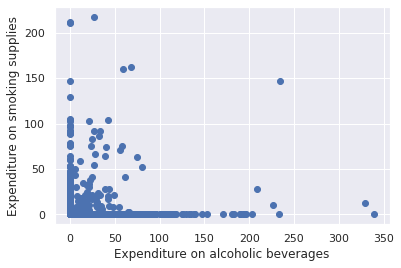

In [38]:
_ = plt.scatter(x='ALCBEV',y='SMOKSUPP', data=Data)
_ = plt.xlabel('Expenditure on alcoholic beverages')
_ = plt.ylabel('Expenditure on smoking supplies')
plt.show()

As can seen in scatterplot 1, the correlation is shown between the expenditure on smoking suppies and alcoholic beverages. Meant with this, is taking a look at those who spent both money on smoking and alcohol. The scatterplot has been used to observe and show relationships between two numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. The biggest group can be found on the left downside of the plotgraph. So, concludable is that the participants will just only spend money on smoking or alcohol. But, there is also an group within the participant who spent money on both. 

In [39]:
x = Data['ALCBEV']
y = Data['SMOKSUPP']
term1 = sum(y*(x-np.mean(x)))
term2 = sum((y-np.mean(y))**2)
term3 = sum((x-np.mean(x))**2)
r = term1/np.sqrt((term2*term3))
print("The correlation is",r)

Smokers = Data.SMOKSUPP >= 0
Drinkers = Data.ALCBEV >= 0
Drinkersandsmokers = Smokers | Drinkers
Mean = np.mean(Data.SMOKSUPP[Drinkersandsmokers]+Data.ALCBEV[Drinkersandsmokers])

print("The mean on alcohol and/or smoking expenditure is", Mean)



The correlation is 0.06286921937211702
The mean on alcohol and/or smoking expenditure is 13.589149317519777


For this scatterplot, two different numerical summaries have been chosen to calculate whether there is a relation between smoking and drinking. The ones used are the correlation coefficient and the mean. 

The correlation coefficient is 0.06 which says something about the relation between whether a participant will be smoking and drinking alcohol or not. Less than 0.20, the correlation is slight; almost negligible relationship. So, for scatterplot 1 this will be the case.

The mean tells something about those partipants who will do both and what the average amount of spending is. The amount that has been calculated is €13.59. Which is a link with the amount of dots in the bottom left of the scatter plot. 

**Scatterplot 2**: relation expenditure on smoking and age of the participant

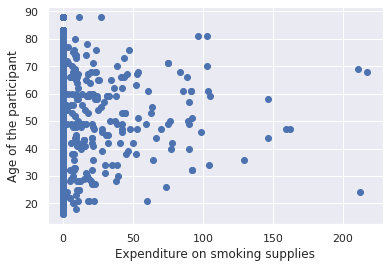

In [40]:
_ = plt.scatter(x='SMOKSUPP',y='AGE_REF', data=Data)
_ = plt.ylabel('Age of the participant')
_ = plt.xlabel('Expenditure on smoking supplies')
plt.show()

In scatterplot 2 is the relationship shown between the age of the participant and the expenditure on smoking supplies. As it is the same as scatterplot 1, where focussing on observing and showing relationships between two numeric variables is the main goal. As can be seen, is the division (correlation) evenly distributed over the ages. The amount of spending is for all categories the biggist between €0 - €50, with some outliers spending more money. 

In [41]:
xbar_direct = np.mean(Data['SMOKSUPP'])
print("The average expediture on smoking supplies based on the age of the participants", xbar_direct )

s = stats.tstd(Data['SMOKSUPP'])
print("The sample standard deviation of expenditure on smoking supplies is", s)


The average expediture on smoking supplies based on the age of the participants 3.2909300790678295
The sample standard deviation of expenditure on smoking supplies is 15.435390421734558


For the two numerical summeries the mean and standard deviation have been calculated. As seen in the scatterplot the data has been used of the participants based on age and the amount of money they spent on smoking supplies, including those who spend €0,00. So, smoking expenditure >= €0,00. 

The calculation of the mean gives a value of €3.29. The reason for a lower mean is because all participants are included. As seen is the standard deviation much higher, namely €15.44. In contrary to the mean is this number very high due to the differences between non-smokers and smokers. It is concludable that the standard deviation is this high of the outlying numbers as seen on the right side of the scatterplot. 

For this scatterplot, it is a clearly visualization of the relationship between age and expenditure on smoking supplies. 

**Histogram 1**: Partipant's smoking and drinking expenditure categorized by range

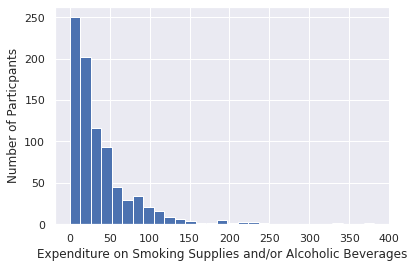

In [42]:
Smokersmorethan0 = Data.SMOKSUPP > 0
Drinkersmorethan0 = Data.ALCBEV > 0
Drinkersandsmokersmorethan0 = Smokersmorethan0 | Drinkersmorethan0
Bin = len(Data.SMOKSUPP[Drinkersandsmokersmorethan0])
Bin2= int(np.sqrt(Bin))
_ = plt.hist(Data.SMOKSUPP[Drinkersandsmokersmorethan0]+Data.ALCBEV[Drinkersandsmokersmorethan0], bins=Bin2)
_ = plt.xlabel('Expenditure on Smoking Supplies and/or Alcoholic Beverages')
_ = plt.ylabel('Number of Particpants')
plt.show()



For the histogram the information of the data has been used, only including those participants who have more than 0 expenditure on smoking supplies and/or alcoholic beverages. When including the participants who have no expenditure on smoking and alcohol will give an unreliable outcome, because the histogram shows the cohesion of a target (number) group and the expenditure. The histogram has been chosen to summarize the distribution of a univariate data set and gives a visual interpretation. Furthermore, it is very handful to use a histogram to compare the data results with specific limits (expenditures). 
As seen in the histogram, the highest percentage of the participants can be visualized between €0 - €50, as going any further the number of participants decrease when the expenditure increases. 


In [43]:
Smokersmorethan0 = Data.SMOKSUPP > 0
Drinkersmorethan0 = Data.ALCBEV > 0
Drinkersandsmokersmorethan0 = Smokersmorethan0 | Drinkersmorethan0
Mean = np.mean(Data.SMOKSUPP[Drinkersandsmokersmorethan0]+Data.ALCBEV[Drinkersandsmokersmorethan0])

print("The mean on alcohol and smoking expenditure is", Mean)

Mode = stats.mode(Data.SMOKSUPP[Drinkersandsmokersmorethan0]+Data.ALCBEV[Drinkersandsmokersmorethan0])

print("The mode on alcohol and smoking expenditure is", int(Mode[0]),'which is counted', int(Mode[1]), 'times')


The mean on alcohol and smoking expenditure is 38.598966678487024
The mode on alcohol and smoking expenditure is 20 which is counted 9 times


To be concluded from the two calculated numerical summaries, the histogram shown above has a mean of 38,6. This means that the average amount of spending money on alcohol and smoking is €38,60 among the participants. Taking a closer look at the other numerical summary, the calculated mode. The outcome of the calculation is €20,00 which has been counted 9 times. 

In contrary to the mean is this number lower. So, mean > mode. As taking a closer look to the histogram it is concludadble that it an asymmetric distribution. It is skewed to the right. A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line.

**Boxplot 1**: Difference smoking expenditure in rural and urban areas

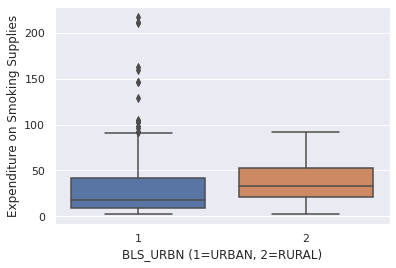

In [44]:
Smokersmorethan0 = Data.SMOKSUPP > 0
_ = sns.boxplot(x='BLS_URBN',y=Data.SMOKSUPP[Smokersmorethan0], data=Data)
_ = plt.xlabel('BLS_URBN (1=URBAN, 2=RURAL)')
_ = plt.ylabel('Expenditure on Smoking Supplies')
plt.show()

For this plot it has been decided to only include participants that spend more than 0 on smoking supplies, as no useful comparison between smoking expenditure between rural and urban areas would be given if non-smokers were included. There has been chosen specifically for a boxplot as a visualization due to the fact that these type of charts are extremely insightful and relevent in comparing the distribution between two different categories.

As can be see in the boxplot there are actually significant differences regarding smoking expenditure amongst smokers between the two different geographical categories.

Whilst the start and end location of the so-called 'whiskers' of the boxplot seem different, these actually vary in length due to the different location of the box in both categories. Hence, for this specific visualiztion it is useful to compare the different boxes via the interquartile range (IQR). This has been done below:


In [45]:
Smokersmorethan0 = Data.SMOKSUPP > 0
urbancondition = Data.BLS_URBN == 1
smokersandurban = urbancondition & Smokersmorethan0
Q1urban = np.percentile(Data.SMOKSUPP[smokersandurban],25)
Q3urban = np.percentile(Data.SMOKSUPP[smokersandurban],75)
IQRurban = Q3urban-Q1urban
print("The interquartile range (IQR) in the urban area is", IQRurban)

Smokersmorethan0 = Data.SMOKSUPP > 0
ruralcondition = Data.BLS_URBN == 2
smokersandrural = ruralcondition & Smokersmorethan0
Q1rural = np.percentile(Data.SMOKSUPP[smokersandrural],25)
Q3rural = np.percentile(Data.SMOKSUPP[smokersandrural],75)
IQRrural = Q3rural-Q1rural
print("The interquartile range (IQR) in the rural area is", IQRrural)

The interquartile range (IQR) in the urban area is 32.578720000000004
The interquartile range (IQR) in the rural area is 31.134999999999998


As can be concluded from these two nummerical summaries, the box in the case of the urban area is slightly larger in comparison to the one in the rural are. Hence, an interpertation from this can be that there is greater variability in the terms of expenditure on smoking supplies in the urban area.

Hence, this means that if one would ask a participant (given the participant is a smoker) in the urban area to clarify their spending on smoking supplies, it is more likely that this answer deviates from the expectations. 

**Boxplot 2:** difference alcohol expenditure in rural and urban areas

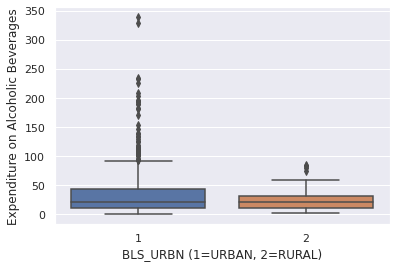

In [46]:
Drinkersmorethan0 = Data.ALCBEV > 0
_ = sns.boxplot(x='BLS_URBN',y=Data.ALCBEV[Drinkersmorethan0], data=Data)
_ = plt.xlabel('BLS_URBN (1=URBAN, 2=RURAL)')
_ = plt.ylabel('Expenditure on Alcoholic Beverages')
plt.show()

This boxplot takes a similar approach to the previous one, however instead of comparing smoking expenditure, the focus here lies on expenditure regarding alcholic beverages. The boxplot compares the expenditure on alcholic beverages between urban and rural areas. As mentioned, this visulization focuses on the distribution of alchol expenditures in two different areas, for this reason a boxplot is chosen. Boxplots are very suitable in displaying differences between two different cateogories.

Simlarly to the previous boxplot, the participants that do not spend anything on alcholic beverages have been left out of the visuzalization, as the purpose of the visuzalization is to compare drinking expenditure between the different demorgraphical areas amongst drinkers only.

In the this boxplot the differences between the two different areas are even more evident. The boxplots suggest greater variabillity in the case of the urban areas. This is due to the fact that both the whiskers and actual box are significantly smaller for the rural area. In addition, the urban area has substantially more outliers.

Even though the pictures suggest greater variability in the case of the urban area, the placement of the boxes seems relatively similar. Hence numerical summaries will be used to compare the median of the two different areas. 



In [47]:
drinkersmorethan0 = Data.ALCBEV > 0
urbancondition = Data.BLS_URBN == 1
drinkersandurban = urbancondition & drinkersmorethan0
MedianUrban = np.median(Data.ALCBEV[drinkersandurban])

print("The median in the urban area is", MedianUrban)

drinkersmorethan0 = Data.ALCBEV > 0
ruralcondition = Data.BLS_URBN == 2
drinkersandrural = ruralcondition & drinkersmorethan0
MedianRural = np.median(Data.ALCBEV[drinkersandrural])

print("The median in the rural area is", MedianRural)

The median in the urban area is 21.74
The median in the rural area is 21.56972


The two given numerical summaries confirm the picture provided by the boxplot, which is that the median is extremely similar in both cases. Hence, the interesting conclusion can be made that while the median is similar in both cases. The data is distributed with greater variability in the urban area in comparison to the data in the rural area.

In conclusion, this means if one would ask participants (who spend money on alcohol) from rural and urban areas what their expenditure is on smoking supplies, the answer is likely to be similar. However, in the case of the participants from the urban area, it is more likely that the answer deviates significantly more from the expecations. 

## Part B: Statistical Inference for Two Samples

Now that you have provided a strong descriptive analysis of the data, it's time do statistical tests and calculate confidence intervals. Again, we will not tell you *which* tests to do. Instead, you will present five tests from Chapter 10. For each test, report the following: 
- the question you are answering with your test in relation to the challenge that you have chosen
- the null-hypothesis
- the means of the two samples 
- the test-statistics and the p-value of your test
- a written interpretation of the test results. 

TIPS: 
- Make sure that you use a variety of concepts from Chapter 10. For example, don't only present tests on the difference of two population proportions. 
- Clearly describe which (parts of the) data you use for which analysis. 
- Motivate why you use the analysis that you are using for your challenge.
- For each analysis, include a written interpretation. What does the result mean? 

End with an overall summary of what you have learned regarding the challenge you have chosen. 

### Two-sided test on expenditures of drinkers in urban and rural areas

As has been concluded in one of the previous histograms, it was seen that the averages regarding alcohol expenditures amongst drinkers was similar in both the rural and urban areas. Hence, a two sided test should help confirm this. 

Therefore, the question to be asked is: if at the α=0.5 level of significance, is there enought evidence to assume that there is a difference in alcohol expenditure amongst drinkers across rural and urban areas?

Where:
- Sample 1: expenditure amongst drinkers in urban areas
- Sample 2: expenditure amongst drinkers in rural areas

H0: μ1 - μ2 = 0 

H1: μ1 - μ2 ≠ 0 

The null hypotheses will be rejected in the case of: 
t(0)<-t(α/2) or if t(0)>t(α/2)

Where -t(α/2) = -1.96 and t(α/2) = 1.96

In [48]:
drinkersmorethan0 = Data.ALCBEV > 0
sample_urban = Data.ALCBEV[drinkersmorethan0][Data['BLS_URBN']==1]
sample_rural = Data.ALCBEV[drinkersmorethan0][Data['BLS_URBN']==2]
print("The sample mean in the urban area is",round(np.mean(sample_urban),4))
print("The sample mean in the rural area is",round(np.mean(sample_rural),4))
print("The difference in the sample means is",round(np.mean(sample_urban)-np.mean(sample_rural),4))
ttest = ttest_ind(sample_urban, sample_rural, alternative='two-sided', usevar='pooled')
teststatistic = ttest[0]
pvalue = ttest[1]
df = ttest[2]
print('The test statistics is',round(teststatistic,4),
      'and p-value:',round(pvalue,5),
      'and',df,'degrees of freedom')

The sample mean in the urban area is 36.0064
The sample mean in the rural area is 27.2179
The difference in the sample means is 8.7884
The test statistics is 1.4853 and p-value: 0.13793 and 697.0 degrees of freedom


As -1.96 < 1.4853 < 1.96 holds, it can be concluded that we will fail to reject the null hypotheses. Meaning it can be said that there is not sufficient evidence to support that there is a difference between the average expenditure of alcoholic beverages across rural and urban areas amongst drinkers.

### Two-sided test on alcohol and prescription drugs

The next test is on the buying of alcohol and the relation of prescription drugs.

---

The question is, is there a difference in the number of prescription drugs between the population that spends money on alcoholic beverages and the poeple that do not.

---

Therefore:

 h_0: μ1 - μ2 = 0

 h_1: μ1 - μ2 ≠ 0 

 ---

The samples we use for this comparison are:

Sample 1: People that spend money on alcoholic beverages

Sample 2: People that do not spend money on alcoholic beverages

---

The null hypotheses will be rejected in the case if the p-value is below the significance level, which is 0.05 or alpha

---

Because this concern as two-tailed t-test the value of the t statistic should be above 1.96 or below -1.96, then the null hypothesis should be rejected.

In [49]:
sample_alc=Data.DRUGSUPP[Data.ALCBEV>0]
sample_nonalc=Data.DRUGSUPP[Data.ALCBEV==0]
print("The sample mean of money spent on prescription drugs among people that spend money on alcoholic beverages is",round(np.mean(sample_alc),4))
print("The sample mean of money spent on prescription drugs among people that do not spend money on alcoholic beverages is",round(np.mean(sample_nonalc),4))
print("The difference in the sample means is",round(np.mean(sample_alc)-np.mean(sample_nonalc),4))
ttest = ttest_ind(sample_alc, sample_nonalc)
teststatistic = ttest[0]
pvalue = ttest[1]
df = ttest[2]
print('The test statistics is',round(teststatistic,4),
      'and p-value:',round(pvalue,5),
      'and',df,'degrees of freedom')

The sample mean of money spent on prescription drugs among people that spend money on alcoholic beverages is 12.7506
The sample mean of money spent on prescription drugs among people that do not spend money on alcoholic beverages is 8.4579
The difference in the sample means is 4.2927
The test statistics is 2.6184 and p-value: 0.00889 and 2401.0 degrees of freedom


Based on the p-value which is lower than 0.05, Therefore there is enough evidence to reject the null hypothesis and say that the population of people that spend money on alcoholic beverages and the people that do not spend money on alcoholic beverages are not equal in spending money on prescription drugs.



### One-sided test on smoking supplies and prescription drugs

The next test is on the buying of tobacco products and the relation of prescription druggs.
The question is, is there a difference in the number of prescription druggs between the population that spends money on tobacco products and the poeple that do not.

---

The samples we use for this comparison are:

Sample 1: Poeple that spend money on tobacco products

Sample 2: People that do not spend money on tobacco products

---

We are not only interested if these groups differ from eachother, but also if the expendatures of sample one are higher compared to sample two. 

---

This creates the following h_0 and h_1:

h_0: μ1 - μ2 = 0 (the means of the two samples are the same)

h_1: μ1 - μ2 > 0 (the mean of sample 1 is higher thant the mean of sample two)

---

The signifcance level of the test will be: α=0.05
Because, only the positive part is important, the use of a one-tailed t-test is required.

---

Because this concern as one-tailed t-test the value of the t statistic should be above 1.96, then the null hypothesis should be rejected.


In [50]:
sample_tob=Data.DRUGSUPP[Data.SMOKSUPP>0]
sample_nontob=Data.DRUGSUPP[Data.SMOKSUPP==0]
print("The sample mean of money spent on prescription drugs among people that spend money on tobacco products is",round(np.mean(sample_tob),4))
print("The sample mean of money spent on prescription drugs among people that do not spend money on tobacco products is",round(np.mean(sample_nontob),4))
print("The difference in the sample means is",round(np.mean(sample_tob)-np.mean(sample_nontob),4))
ttest = ttest_ind(sample_tob, sample_nontob)
teststatistic = ttest[0]
pvalue = ttest[1]
df = ttest[2]
print('The test statistics is',round(teststatistic,4),
      'and p-value:',round(pvalue,5),
      'and',df,'degrees of freedom')

The sample mean of money spent on prescription drugs among people that spend money on tobacco products is 6.4823
The sample mean of money spent on prescription drugs among people that do not spend money on tobacco products is 10.0495
The difference in the sample means is -3.5672
The test statistics is -1.4108 and p-value: 0.15844 and 2401.0 degrees of freedom


Based on the result of the one-tailed t-test, there is not enough evidence to reject the hypothesis that people that do spend moeny on Tobacco products spend and equal amount on prescription drugs. Therefore this hypothesis stands. One thing to take away from this is that is weird that the mean amount spent on prescription drugs for people that spend money on tobacco products is lower compared to the people that do not spend money on tobacco products.

### Two-sided test on variance of spent amound on prescription drugs by buyers of smoking supplies and those who do not.

One might be interested in the variance of amount spend on prescription drugs by people that do buy smoking supplies and the people that do not.

---

For this we will perform an F-test to determine if there are significant differences in the sample variances. This is tested using a H_0 and H_1.

---

The samples we use for this comparison are:

Sample 1: Poeple that spend money on tobacco products

Sample 2: People that do not spend money on tobacco products

---

The hypotheses that are tested are listed below:

H_0: sigma^2_1-sigma^2_2 = 0

H_1: sigma^2_1-sigma^2_2 ≠ 0 

Note that we are interested in both a smaller and larger variance in the amount spent on prescription drugs by the both samples.

---

For this test we are using a confidence interval of 95%. This results in a=0.05. We will reject the null hypothesis if the p-value is below 0.05. In other words the f-statistic (f_0) is f_0 < f_0.025,u,v or f_0 > f_0.975,u,v where u and v are the degrees of freedom from sample 1 and sampole 2 respectively.

In [51]:
sample_tob=Data.DRUGSUPP[Data.SMOKSUPP>0]
sample_nontob=Data.DRUGSUPP[Data.SMOKSUPP==0]
print("The sample variance of money spent on prescription drugs among people that spend money on tobacco products is",round(np.var(sample_tob),4))
print("The sample variance of money spent on prescription drugs among people that do not spend money on tobacco products is",round(np.var(sample_nontob),4))
print("The difference in the sample variance is",round(np.var(sample_tob)-np.var(sample_nontob),4))
dof1=len(sample_tob)-1
dof2=len(sample_nontob)-1
print('The degrees of freedom for sample 1 are ',dof1)
print('The degrees of freedom for sample 2 are ',dof2)
fstatistic=round((np.var(sample_tob)/dof1)/(np.var(sample_nontob)/dof2),2)
print('The f-statistic is',fstatistic)
fupper=stats.f.isf(0.025,dof1,dof2)
flower=stats.f.isf(0.975,dof1,dof2)
print('To reject the null hypothesis',fstatistic,'<',flower,'or', fstatistic,'>',fupper)
if fstatistic>fupper or fstatistic<flower:
  print('We can reject the null hypothesis because above statement is TRUE')
else:
  print('We cannot reject the null hypothesis because the above stamenet is FALSE')

The sample variance of money spent on prescription drugs among people that spend money on tobacco products is 535.6277
The sample variance of money spent on prescription drugs among people that do not spend money on tobacco products is 1418.7266
The difference in the sample variance is -883.0989
The degrees of freedom for sample 1 are  230
The degrees of freedom for sample 2 are  2171
The f-statistic is 3.56
To reject the null hypothesis 3.56 < 0.818583171767293 or 3.56 > 1.2032273407876108
We can reject the null hypothesis because above statement is TRUE


Because we can reject the null hypothesis, there is enough evidence to support that the variance in spending amount on prescription drugs is different between sample one and sample 2. Looking at the data from the test cell, it is easy to see that the variance of an estimator for sample 1 is higher than it would be for sample 2. This means that typically the values of the amount spend on prescriptions drugs and spend money on smoking supplies are less centered around the expected value than the values from sample two. To find the reason behind this, extra research is required.

### Two-sided test on population proportion money spent on smoking supplies by people that buy alcohol and the ones that do not

For the last test, we want to know if people that spend money on alcoholic beverages will be more likely to spend money on smoking supplies or not. For thos proportion test, we assume spending money on smoking supplies as an binomial: either 1 or 0. Because the degrees of freedom for the distribution are unknown beforehand, we estimate using a t-distribution instead of a normal distribution.

---

For testing we define the samples as below:


*   Sample 1: People that spend money on alcoholic beverages
*   Sample 2: People that do not spend money on alcoholic beverages

---

We assume that people that spend money on alcoholic beverages and the people that do not spend money on alcoholic beverages are equally likely to spend money on smokiung supplies.

therefore:

H_0: mu_1 - mu_2 = 0

We are interested in both sides, therefore:

H_1: mu_1 - mu_2 ≠ 0

---

We want to be certain, so a confidence level of 95% is used, therefore alpha = 0.05. The null hypothesis is rejected if p < 0.05, in other words: the t-statistic is below -1.96 or above 1.96.



In [52]:
sample1=np.array(Data.SMOKSUPP[Data.ALCBEV>0].values.tolist())
sample2=np.array(Data.SMOKSUPP[Data.ALCBEV==0].values.tolist())

sample1n=np.where(sample1 > 0, 1, sample1).tolist()
sample2n=np.where(sample2 > 0, 1, sample2).tolist()

print("The sample mean for sample 1 is",round(np.mean(sample1n),4))
print("The sample mean for sample 2 is",round(np.mean(sample2n),4))
print("The difference in the sample means is",round(np.mean(sample1n)-np.mean(sample2n),4))
ttest = ttest_ind(sample1n, sample2n)
teststatistic = ttest[0]
pvalue = ttest[1]
df = ttest[2]
print('The test statistics is',round(teststatistic,4),
      'and p-value:',round(pvalue,5),
      'and',df,'degrees of freedom')

if teststatistic>1.96 or teststatistic<-1.96:
  print('The null hypothesis is rejected becasue',teststatistic,'> 1.96 or <-1.96')
else:
    print('The null hypothesis cannot be rejected becasue',teststatistic,'< 1.96 and/or >-1.96')



The sample mean for sample 1 is 0.1202
The sample mean for sample 2 is 0.0863
The difference in the sample means is 0.0339
The test statistics is 2.5632 and p-value: 0.01043 and 2401.0 degrees of freedom
The null hypothesis is rejected becasue 2.5631778786559725 > 1.96 or <-1.96


Based on the result of the t-test, the null hypothesis is rejected, which means that people that spent money on alcoholic beverages and people that do not spend money on alcoholic beverages are not equally likely to spend money on smoking supplies.


